In [18]:
#U-net
import numpy as np 
import matplotlib.pyplot as plt
import os 
import random 
import torch
from torch import nn, optim
from torch.nn import functional as F
from torchvision import transforms as T
from torch.utils.data import DataLoader, Dataset, random_split


import PIL
from PIL import Image

from jupyterthemes import jtplot
jtplot.style()

In [19]:
#GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [20]:
#Dataset and Dataloader

PATH = 'C:/Users/dilan/Desktop/trabajos pendientes/PASANTIA/CODIGOS/Redes neuronales convolucionales'
TRAIN_PATH = 'C:/Users/dilan/Desktop/trabajos pendientes/PASANTIA/CODIGOS/Redes neuronales convolucionales/train/train'
TRIN_MASK_PATH = 'C:/Users/dilan/Desktop/trabajos pendientes/PASANTIA/CODIGOS/Redes neuronales convolucionales/train_masks/train_masks'
TEST_PATH = 'C:/Users/dilan/Desktop/trabajos pendientes/PASANTIA/CODIGOS/Redes neuronales convolucionales/test/test'

In [21]:
class Car_Dataset(Dataset):
    def __init__(self,data , masks=None, img_transforms=None, mask_transforms=None):

        self.train_data = data
        self.train_masks = masks

        self.img_transforms = img_transforms
        self.mask_transforms = mask_transforms

        self.images = sorted(os.listdir(self.train_data))
        self.masks = sorted(os.listdir(self.train_masks))
    
    def __len__(self):
        if self.train_masks is not None:
            assert len(self.images)==len(self.masks), 'not the same number of images and masks'
        
        return len(self.images)
    
    def __getitem__(self, idx):
        image_name = os.path.join(self.train_data, self.images[idx])
        img = Image.open(image_name)
        trans = T.ToTensor()
        if self.img_transforms is not None:
            img = self.img_transforms(img)
        else:
            img=trans(img)

        if self.train_masks is not None:
            mask_name = os.path.join(self.train_masks, self.masks[idx])
            mask = Image.open(mask_name)
            if self.mask_transforms is not None:
                mask = self.mask_transforms(mask)
            else:
                mask = trans(mask)

            mask_max = mask.max().item()
            mask /= mask_max
        else:
            return img
        
        return img,mask

In [22]:
#Transformaciones 

transform_data = T.Compose([
                T.Resize([244,244]),
                T.ToTensor()
                ])

In [23]:
#Dataloader

full_dataset = Car_Dataset(TRAIN_PATH,
                            TRIN_MASK_PATH,
                            img_transforms=transform_data,
                            mask_transforms=transform_data)

BATCH_SIZE = 32
TRAIN_SIZE = int(len(full_dataset)*0.8)
VAL_SIZE = len(full_dataset) - TRAIN_SIZE

print(TRAIN_SIZE, VAL_SIZE)

train_dataset, val_dataset = random_split(full_dataset, [TRAIN_SIZE, VAL_SIZE])

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)

imgs, masks = next(iter(train_loader))
print(imgs.shape, masks.shape)


4070 1018
torch.Size([32, 3, 244, 244]) torch.Size([32, 1, 244, 244])


In [24]:
for i, (x, y) in enumerate(train_loader):
    print(i, x.shape, y.shape)
    if i ==9: break

0 torch.Size([32, 3, 244, 244]) torch.Size([32, 1, 244, 244])
1 torch.Size([32, 3, 244, 244]) torch.Size([32, 1, 244, 244])
2 torch.Size([32, 3, 244, 244]) torch.Size([32, 1, 244, 244])
3 torch.Size([32, 3, 244, 244]) torch.Size([32, 1, 244, 244])
4 torch.Size([32, 3, 244, 244]) torch.Size([32, 1, 244, 244])
5 torch.Size([32, 3, 244, 244]) torch.Size([32, 1, 244, 244])
6 torch.Size([32, 3, 244, 244]) torch.Size([32, 1, 244, 244])
7 torch.Size([32, 3, 244, 244]) torch.Size([32, 1, 244, 244])
8 torch.Size([32, 3, 244, 244]) torch.Size([32, 1, 244, 244])
9 torch.Size([32, 3, 244, 244]) torch.Size([32, 1, 244, 244])


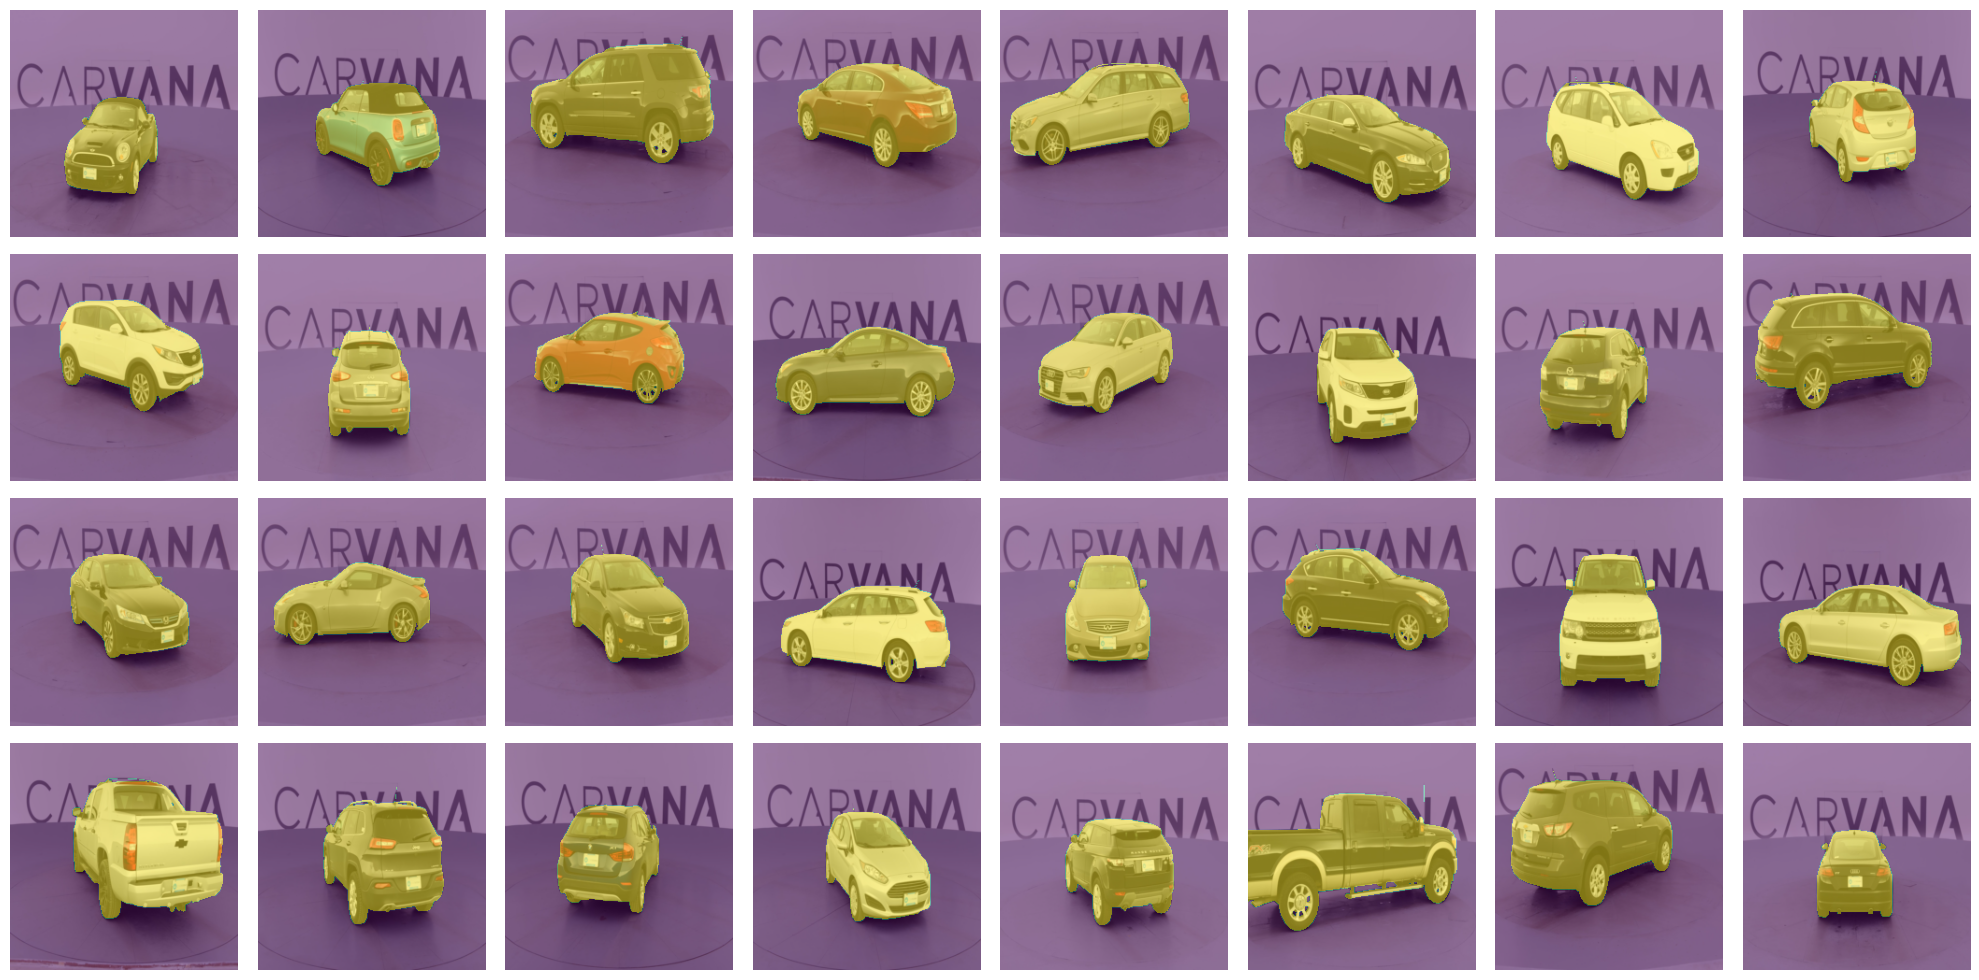

In [30]:
# let us see the data

imgs, masks = next(iter(train_loader))
def plot_mini_batch(imgs, masks):
    plt.figure(figsize=(20,10))
    for i in range(BATCH_SIZE):

        plt.subplot(4, 8, i+1)
        img = imgs[i, ...].permute(1,2,0).numpy()
        mask = masks[i, ...].permute(1,2,0).numpy()
        
        plt.imshow(img)
        plt.imshow(mask, alpha=0.5)

        plt.axis('Off')
    plt.tight_layout()
    plt.show
plot_mini_batch(imgs, masks)

plt.imshow(img)